In [1]:
import os
import pandas as pd
from pathlib import Path, PosixPath
from typing import NamedTuple

In [2]:
pd.set_option("display.max_columns", None)  # display all columns
pd.set_option(
    "float_format", "{:,.2f}".format
)  # display floats with commas and two decimal places

In [3]:
# NamedTuple type hint
class ParametersType(NamedTuple):
    acs_path: PosixPath  # Platform neutral pathlib PosixPath to ACS data
    openai_api_key: str  # OpenAI API key

In [4]:
Parameters: ParametersType = ParametersType(
    acs_path=Path("./Data/ACS_2012_21.csv"), openai_api_key=os.environ["OPENAI_API_KEY"]
)

# ACS Data

In [5]:
acs_df: pd.DataFrame = pd.read_csv(Parameters.acs_path)
acs_df.drop(columns=["Unnamed: 0"], inplace=True)
display(acs_df.info())
display(acs_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 95 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Geography                                                     520 non-null    object 
 1   Geographic Area Name                                          520 non-null    object 
 2   Total population                                              520 non-null    int64  
 3   Male                                                          520 non-null    int64  
 4   Female                                                        520 non-null    int64  
 5   Under 5 years                                                 520 non-null    int64  
 6   5 to 9 years                                                  520 non-null    int64  
 7   10 to 14 years                                                520 non-n

None

,Geography,Geographic Area Name,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years),18 years and over,21 years and over,65 years and over,One race,Two or more races,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,Hispanic or Latino (of any race),Not Hispanic or Latino,Total housing units_x,YEAR,Total households,Households with one or more people under 18 years,Households with one or more people 65 years and over,Average household size,Males 15 years and over,"Never married, Males 15 years and over","Now married, except separated, Males 15 years and over","Separated, Males 15 years and over","Widowed, Males 15 years and over","Divorced, Males 15 years and over",Females 15 years and over,"Never married, Females 15 years and over","Now married, except separated, Females 15 years and over","Separated, Females 15 years and over","Widowed, Females 15 years and over","Divorced, Females 15 years and over",Population 3 years and over enrolled in school,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,Native,Foreign born,Language other than English,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Civilian employed population 16 years and over,"Management, business, science, and arts occupations",Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Median family income (dollars),Mean family income (dollars),Per capita income (dollars),Civilian noninstitutionalized population,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,Total housing units_y,Occupied housing units,Vacant housing units,Homeowner vacancy rate,Rental vacancy rate,Median rooms,"Median (dollars), Value",Owner-occupied units,Housing units with a mortgage,Housing units without a mortgage,"Median (dollars), Rent",No rent paid
0,0400000US01,Alabama,4777326,2317520,2459806,305091,309360,318484,337159,340808,607797,619112,686672,310336,279202,374441,211411,77453,37.80,3647097,3433673,663305,4710487,66839,3379235,1285740,57219,66512,2901,56469,182268,4595058,2172647,2012,"1,837,576.00","597,337.00","475,330.00",2.54,"1,841,356.00","584,355.00","957,174.00","39,467.00","52,899.00","207,461.00","2,003,035.00","517,693.00","937,087.00","61,290.00","222,434.00","264,531.00","1,220,805.00","3,166,424.00","187,882.00","363,148.00","991,406.00","691,686.00","227,301.00","448,117.00","256,884.00","4,610,592.00","166,734.00","230,806.00",3779457,2265008,2248665,2017887,230778,16343,1514449,2017887,643951,332351,507206,218389,315990,54326,70237,23587,4693822,4039446,3112613,1524117,654376,2172647,1837576,335071,2.50,9.00,5.70,122300,1289324,776946,512378,691,63064
1,0400000US01,Alabama,4817678,2336020,2481658,299571,304412,321104,327579,347110,618482,610792,675347,322017,292003,401417,217634,80210,38.20,3699760,3491373,699261,4741250,76428,3393927,1304167,58134,72528,3737,65898,191838,4625840,2190638,2013,"1,838,683.00","592,093.00","486,161.00",2.55,"1,854,423.00","596,005.00","952,726.00","40,229.00","54,972.00","210,491.00","2,016,442.00","530,755.00","932,261.00","61,058.00","222,995.00","269,373.00","1,222,995.00","3,193,338.00","180,671.00","358,529.00","991,730.00","703,243.00","236,473.00","458,393.00","264,299.00","4,631,045.00","168,232.00","235,741.00",3806434,2259344,2244093,2002163,241930,15251,1547090,2002163,652201,335865,494371,209494,310232,54362,70661,23680,4716915,4061521,3093955,1568842,

**For each year, how many five to nine year olds are in Kentucky?**

<span style="color:brown">Code was generated by Github Copilot</span>

In [19]:
# Return a dataframe containing the number of five to nine years olds in Kentucky by year.
# Use the ACS dataframe and columns: "Geographic Area Name", "YEAR", and "5 to 9 years.
def get_ky_5_to_9_years_df(acs_df: pd.DataFrame) -> pd.DataFrame:
    return acs_df.loc[
        (acs_df["Geographic Area Name"] == "Kentucky") & (acs_df["YEAR"] >= 2010),
        ["YEAR", "5 to 9 years"],
    ].copy()

<span style="color:brown">Code was generated by Github Copilot</span>

In [21]:
# Dataframe containing the number of five to nine years olds in Kentucky by year.
ky_5_to_9_years_df: pd.DataFrame = get_ky_5_to_9_years_df(acs_df)
ky_5_to_9_years_df

,YEAR,5 to 9 years
170,2012,280790
171,2013,282464
172,2014,282577
173,2015,281090
174,2016,282564
175,2017,280088
176,2018,281151
177,2019,275466
178,2020,275013
179,2021,279548


<span style="color:brown">Code was generated by Github Copilot</span>

<Axes: title={'center': 'Number of five to nine years olds in Kentucky by year'}, xlabel='YEAR'>

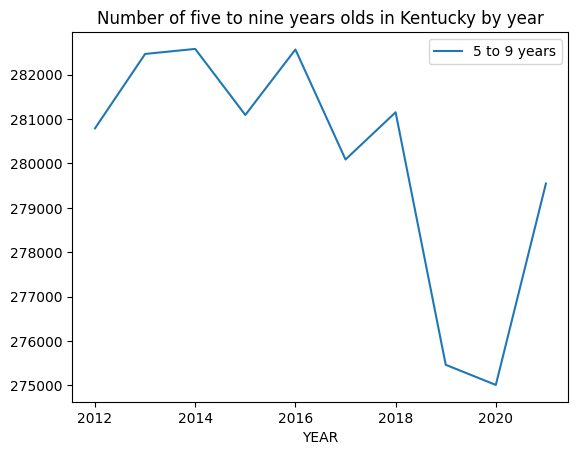

In [23]:
# Line plot of the number of five to nine years olds in Kentucky by year.
ky_5_to_9_years_df.plot(
    x="YEAR",
    y="5 to 9 years",
    kind="line",
    title="Number of five to nine years olds in Kentucky by year",
)